In [2]:
# install dependencies

!pip install prophet
!pip install yfinance

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 1.8 MB/s eta 0:00:08
   - -------------------------------------- 0.4/13.3 MB 3.7 MB/s eta 0:00:04
   --- ------------------------------------ 1.1/13.3 MB 7.2 MB/s eta 0:00:02
   ------- -------------------------------- 2.6/13.3 MB 12.6 MB/s eta 0:00:01
   ------------ --------------------------- 4.1/13.3 MB 16.5 MB/s eta 0:00:01
   ------------------ --------------------- 6.2/13.3 MB 19.9 MB/s eta 0:00:01
   ------------------------- -------------- 8.4/13.3 MB 23.4 MB/s eta 0:00:01
   ----------------------------- ---------- 9.7/13.3 MB 23.8 MB/s eta 0:00:01
   --------------------------------- ------ 11.0/13.3 MB 34.4 MB/s eta 0:00:01
   ------------------------------------- -- 12.6/13.3 MB 34.6 MB/s eta 0:00:01
   ---------------------------------------  13.3/13.3 MB 32.7 MB/s eta 0:00:01
  

In [1]:
# Run 1st

import pandas as pd
import requests
import json
import datetime as dt
from prophet import Prophet
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# Run 2nd

running_shorts_df = pd.read_csv("resources/running_shorts.csv", skiprows=1, header=None, names=['Month', 'Running Shorts'])
tennis_skirt_df = pd.read_csv('resources/tennis_skirt.csv', skiprows=1, header=None, names=['Month', 'Tennis Skirts'])
lulu_lemon_df = pd.read_csv('resources/lululemon.csv', skiprows=1, header=None, names=['Month', 'lululemon Sales'])

# add them all to a list
list_of_dfs = [running_shorts_df, tennis_skirt_df, lulu_lemon_df]

In [5]:
# Run 3rd 
# Clean the dataframes

def clean_dataframes(dfs_list):
    for df in dfs_list:
        df.drop(0, inplace=True)

clean_dataframes(list_of_dfs)

# Display the dataframes

for df in list_of_dfs:
    print(df)


       Month Running Shorts
1    2014-01             19
2    2014-02             22
3    2014-03             29
4    2014-04             31
5    2014-05             38
..       ...            ...
116  2023-08             56
117  2023-09             42
118  2023-10             33
119  2023-11             34
120  2023-12             29

[120 rows x 2 columns]
       Month Tennis Skirts
1    2014-01             8
2    2014-02             8
3    2014-03            10
4    2014-04             8
5    2014-05            10
..       ...           ...
116  2023-08            63
117  2023-09            55
118  2023-10            42
119  2023-11            32
120  2023-12            26

[120 rows x 2 columns]
       Month lululemon Sales
1    2014-01              23
2    2014-02              20
3    2014-03              22
4    2014-04              20
5    2014-05              18
..       ...             ...
116  2023-08              63
117  2023-09              57
118  2023-10              61
11

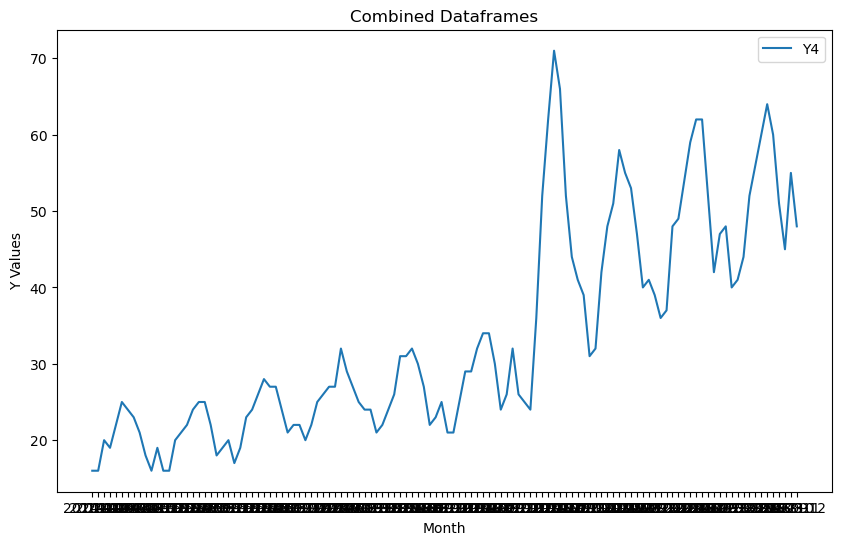

In [6]:
# RUN 4th

df1 = running_shorts_df 
df2 = tennis_skirt_df
df3 = lulu_lemon_df  

# Merge or concatenate dataframes based on the date
merged_df = pd.merge(df1, df2, on='Month').merge(df3, on='Month')

merged_df['Running Shorts'] = pd.to_numeric(merged_df['Running Shorts'], errors='coerce')
merged_df['Tennis Skirts'] = pd.to_numeric(merged_df['Tennis Skirts'], errors='coerce')
merged_df['lululemon Sales'] = pd.to_numeric(merged_df['lululemon Sales'], errors='coerce')

# Convert 'Date' column to datetime
merged_df['Y4'] = ((merged_df['Running Shorts'] + merged_df['Tennis Skirts'] + merged_df['lululemon Sales']) / 3).astype(int)

# Plot the data
plt.figure(figsize=(10, 6))

# Plot the average
plt.plot(merged_df['Month'], merged_df['Y4'], label='Y4')

plt.xlabel('Month')
plt.ylabel('Y Values')
plt.title('Combined Dataframes')
merged_df.head()
plt.legend()
plt.show()

In [7]:
# Run 5th

stock_and_google_trends_df = merged_df
merged_df

,Month,Running Shorts,Tennis Skirts,lululemon Sales,Y4
0,2014-01,19,8,23,16
1,2014-02,22,8,20,16
2,2014-03,29,10,22,20
3,2014-04,31,8,20,19
4,2014-05,38,10,18,22
...,...,...,...,...,...
115,2023-08,56,63,63,60
116,2023-09,42,55,57,51
117,2023-10,33,42,61,45
118,2023-11,34,32,100,55


In [8]:
# Run 6th

import yfinance as yf
import pandas as pd

# Your existing code to get the stock data
ticker_symbol = 'NKE'
start_date = '2014-01-01'
end_date = '2023-01-01'
ticker = yf.Ticker(ticker_symbol)
hist = ticker.history(start=start_date, end=end_date, interval="1mo")
df = pd.DataFrame(hist).reset_index().rename(columns={'Date': 'Month'})

# Convert 'Month' to datetime format (if not already)
df['Month'] = pd.to_datetime(df['Month'])

# Convert 'Month' to period (year-month format) and then to string (object)
df['Month'] = df['Month'].dt.to_period('M').astype(str)

# Create a new DataFrame with 'Month' and 'Close'
stock_df = df[['Month', 'Close']]
stock_df


C:\Users\mdadv\AppData\Local\Temp\ipykernel_4632\2413978488.py:18: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Month'] = df['Month'].dt.to_period('M').astype(str)


,Month,Close
0,2014-01,32.627937
1,2014-02,35.068871
2,2014-03,33.181835
3,2014-04,32.773014
4,2014-05,34.552071
...,...,...
103,2022-08,104.469940
104,2022-09,81.573891
105,2022-10,91.217339
106,2022-11,107.958878


In [9]:
# Run 7th
stock_and_google_trends_df = pd.merge(merged_df, stock_df, on='Month')
stock_and_google_trends_df

,Month,Running Shorts,Tennis Skirts,lululemon Sales,Y4,Close
0,2014-01,19,8,23,16,32.627937
1,2014-02,22,8,20,16,35.068871
2,2014-03,29,10,22,20,33.181835
3,2014-04,31,8,20,19,32.773014
4,2014-05,38,10,18,22,34.552071
...,...,...,...,...,...,...
103,2022-08,54,68,64,62,104.469940
104,2022-09,41,59,58,52,81.573891
105,2022-10,28,44,56,42,91.217339
106,2022-11,28,27,86,47,107.958878


In [10]:
# Run 8th

# Calculate percentage change for 'Stock Price'
stock_and_google_trends_df['Stock Price % Change'] = stock_and_google_trends_df['Close'].pct_change() * 100

# Calculate percentage change for 'Y4'
stock_and_google_trends_df['Y4 % Change'] = stock_and_google_trends_df['Y4'].pct_change() * 100
stock_and_google_trends_df.dropna()

,Month,Running Shorts,Tennis Skirts,lululemon Sales,Y4,Close,Stock Price % Change,Y4 % Change
1,2014-02,22,8,20,16,35.068871,7.481114,0.000000
2,2014-03,29,10,22,20,33.181835,-5.380941,25.000000
3,2014-04,31,8,20,19,32.773014,-1.232063,-5.000000
4,2014-05,38,10,18,22,34.552071,5.428419,15.789474
5,2014-06,43,14,18,25,34.949570,1.150435,13.636364
...,...,...,...,...,...,...,...,...
103,2022-08,54,68,64,62,104.469940,-7.370335,0.000000
104,2022-09,41,59,58,52,81.573891,-21.916400,-16.129032
105,2022-10,28,44,56,42,91.217339,11.821733,-19.230769
106,2022-11,28,27,86,47,107.958878,18.353461,11.904762


In [11]:
# Run 9th

stock_and_google_trends_df[['Y4 % Change', "Stock Price % Change"]].corr()

,Y4 % Change,Stock Price % Change
Y4 % Change,1.000000,0.068027
Stock Price % Change,0.068027,1.000000


<Axes: >

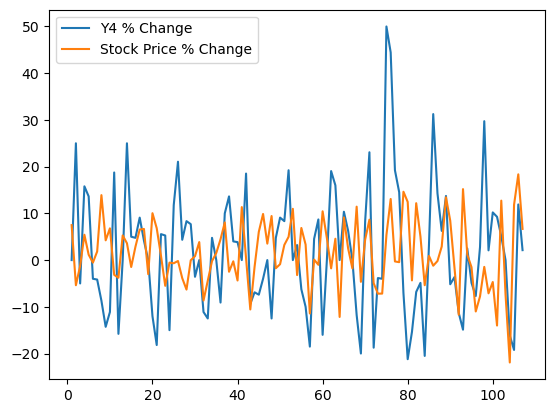

In [12]:
# Run 10th
stock_and_google_trends_df[['Y4 % Change', "Stock Price % Change"]].plot()

In [88]:
## Prophet Modeling next

In [13]:
# Prophet looping
from prophet import Prophet
import matplotlib.pyplot as plt

# Model for dfs that go > 100
def logistic_forecast(df):
    # Ensure correct column names
    df.columns = ['ds', 'y']
    df['cap'] = 100
    df['floor'] = 0

    model = Prophet(growth='logistic')
    model.fit(df)

    # Make future dataframe and predict
    future = model.make_future_dataframe(periods=60, freq='M')
    future['cap'] = 100
    future['floor'] = 0
    forecast = model.predict(future)

    # Create and save the plot
    fig = model.plot(forecast)
    plt.close(fig)  # Close the plot to prevent it from displaying immediately

    return {'dataframe': forecast, 'plot': fig}


# Main Function

def df_forecast(df_list):
    results = {}  # Dictionary to store forecasts and plots

    for i, df in enumerate(df_list, start=1):
        # Ensure correct column names
        df.columns = ['ds', 'y']

        # Fit the Prophet model
        m = Prophet()
        m.fit(df)

        # Make future dataframe and predict
        future = m.make_future_dataframe(periods=60, freq='M')
        forecast = m.predict(future)

        # Check if any yhat values are above 100
        if forecast['yhat'].max() > 100:
            # Call logistic forecast function
            result = logistic_forecast(df)
        else:
            # Create and save the plot for non-logistic forecast
            fig = m.plot(forecast)
            plt.close(fig)  # Close the plot to prevent it from displaying immediately
            result = {'dataframe': forecast, 'plot': fig}

        # Store forecast and plot in the dictionary
        results[f'forecast{i}'] = result

    return results
    

In [14]:
dfs = list_of_dfs 

all_results = df_forecast(dfs)

18:50:46 - cmdstanpy - INFO - Chain [1] start processing
18:50:46 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\mdadv\anaconda\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\mdadv\anaconda\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
18:50:47 - cmdstanpy - INFO - Chain [1] start processing
18:50:47 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\mdadv\anaconda\Lib\site-packages\prophet\plot.py:7

forecast1


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,28.611800,5.527387,22.635328,28.611800,28.611800,-14.242005,-14.242005,-14.242005,-14.242005,-14.242005,-14.242005,0.0,0.0,0.0,14.369795
1,2014-02-01,28.801932,10.825017,26.841102,28.801932,28.801932,-9.979562,-9.979562,-9.979562,-9.979562,-9.979562,-9.979562,0.0,0.0,0.0,18.822369
2,2014-03-01,28.973663,18.088489,34.984495,28.973663,28.973663,-2.687770,-2.687770,-2.687770,-2.687770,-2.687770,-2.687770,0.0,0.0,0.0,26.285894
3,2014-04-01,29.163795,24.728845,41.669045,29.163795,29.163795,4.353169,4.353169,4.353169,4.353169,4.353169,4.353169,0.0,0.0,0.0,33.516964
4,2014-05-01,29.347793,34.031606,50.432532,29.347793,29.347793,12.578785,12.578785,12.578785,12.578785,12.578785,12.578785,0.0,0.0,0.0,41.926578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2028-07-31,40.687355,45.376090,62.400904,39.150367,42.363628,12.930914,12.930914,12.930914,12.930914,12.930914,12.930914,0.0,0.0,0.0,53.618269
176,2028-08-31,40.661931,34.743217,52.427112,39.089642,42.390009,3.100269,3.100269,3.100269,3.100269,3.100269,3.100269,0.0,0.0,0.0,43.762199
177,2028-09-30,40.637327,22.073571,39.311444,39.033960,42.420302,-10.021766,-10.021766,-10.021766,-10.021766,-10.021766,-10.021766,0.0,0.0,0.0,30.615561
178,2028-10-31,40.611903,18.994287,36.022253,38.979969,42.449481,-13.081489,-13.081489,-13.081489,-13.081489,-13.081489,-13.081489,0.0,0.0,0.0,27.530415


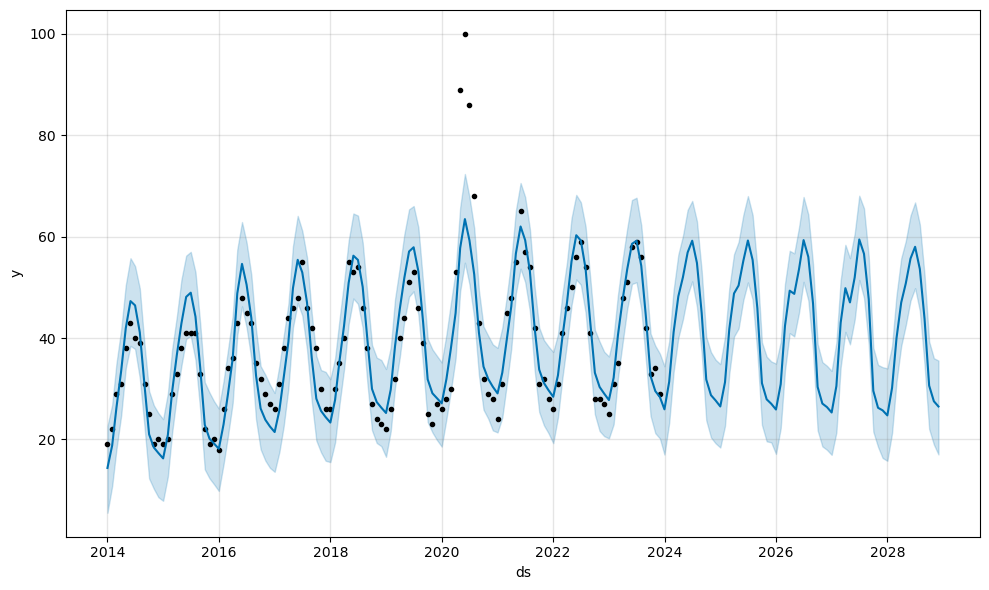

forecast2


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,4.853180,-19.972010,14.326367,4.853180,4.853180,-8.778836,-8.778836,-8.778836,-8.778836,-8.778836,-8.778836,0.0,0.0,0.0,-3.925656
1,2014-02-01,5.228824,-17.430935,14.888770,5.228824,5.228824,-7.020650,-7.020650,-7.020650,-7.020650,-7.020650,-7.020650,0.0,0.0,0.0,-1.791827
2,2014-03-01,5.568115,-11.958497,19.543719,5.568115,5.568115,-1.778866,-1.778866,-1.778866,-1.778866,-1.778866,-1.778866,0.0,0.0,0.0,3.789248
3,2014-04-01,5.943758,-11.285537,22.555261,5.943758,5.943758,0.100014,0.100014,0.100014,0.100014,0.100014,0.100014,0.0,0.0,0.0,6.043773
4,2014-05-01,6.307284,-6.681018,24.684480,6.307284,6.307284,2.750049,2.750049,2.750049,2.750049,2.750049,2.750049,0.0,0.0,0.0,9.057334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2028-07-31,83.187437,79.728261,111.553591,82.353771,83.987134,12.319424,12.319424,12.319424,12.319424,12.319424,12.319424,0.0,0.0,0.0,95.506860
176,2028-08-31,83.671531,74.644371,107.726832,82.808889,84.494041,8.252387,8.252387,8.252387,8.252387,8.252387,8.252387,0.0,0.0,0.0,91.923917
177,2028-09-30,84.140009,67.324189,100.165089,83.246393,84.990394,-0.395666,-0.395666,-0.395666,-0.395666,-0.395666,-0.395666,0.0,0.0,0.0,83.744344
178,2028-10-31,84.624103,58.609583,89.264474,83.711813,85.493445,-10.224928,-10.224928,-10.224928,-10.224928,-10.224928,-10.224928,0.0,0.0,0.0,74.399176


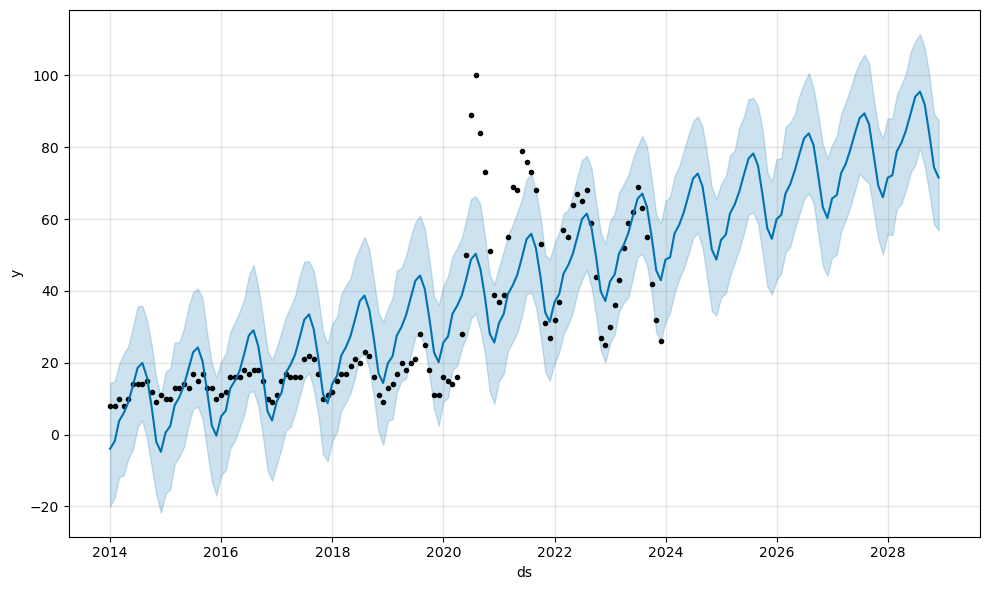

forecast3


,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,9.063237,100,0,4.486338,23.119200,9.063237,9.063237,4.323460,4.323460,4.323460,4.323460,4.323460,4.323460,0.0,0.0,0.0,13.386697
1,2014-02-01,9.258418,100,0,1.469810,19.727757,9.258418,9.258418,1.251460,1.251460,1.251460,1.251460,1.251460,1.251460,0.0,0.0,0.0,10.509878
2,2014-03-01,9.437946,100,0,-0.541229,18.786849,9.437946,9.437946,-0.043798,-0.043798,-0.043798,-0.043798,-0.043798,-0.043798,0.0,0.0,0.0,9.394148
3,2014-04-01,9.640341,100,0,-0.656292,18.163636,9.640341,9.640341,-0.710601,-0.710601,-0.710601,-0.710601,-0.710601,-0.710601,0.0,0.0,0.0,8.929739
4,2014-05-01,9.839889,100,0,-0.149959,18.437823,9.839889,9.839889,-0.799164,-0.799164,-0.799164,-0.799164,-0.799164,-0.799164,0.0,0.0,0.0,9.040725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2028-07-31,84.873279,100,0,76.163367,94.758111,84.871564,84.874946,-0.294106,-0.294106,-0.294106,-0.294106,-0.294106,-0.294106,0.0,0.0,0.0,84.579173
176,2028-08-31,85.172172,100,0,69.528348,88.279665,85.170423,85.173854,-6.016330,-6.016330,-6.016330,-6.016330,-6.016330,-6.016330,0.0,0.0,0.0,79.155842
177,2028-09-30,85.456762,100,0,75.798836,93.804798,85.455001,85.458451,-0.608201,-0.608201,-0.608201,-0.608201,-0.608201,-0.608201,0.0,0.0,0.0,84.848561
178,2028-10-31,85.746062,100,0,92.552170,111.037782,85.744294,85.747763,16.003349,16.003349,16.003349,16.003349,16.003349,16.003349,0.0,0.0,0.0,101.749411


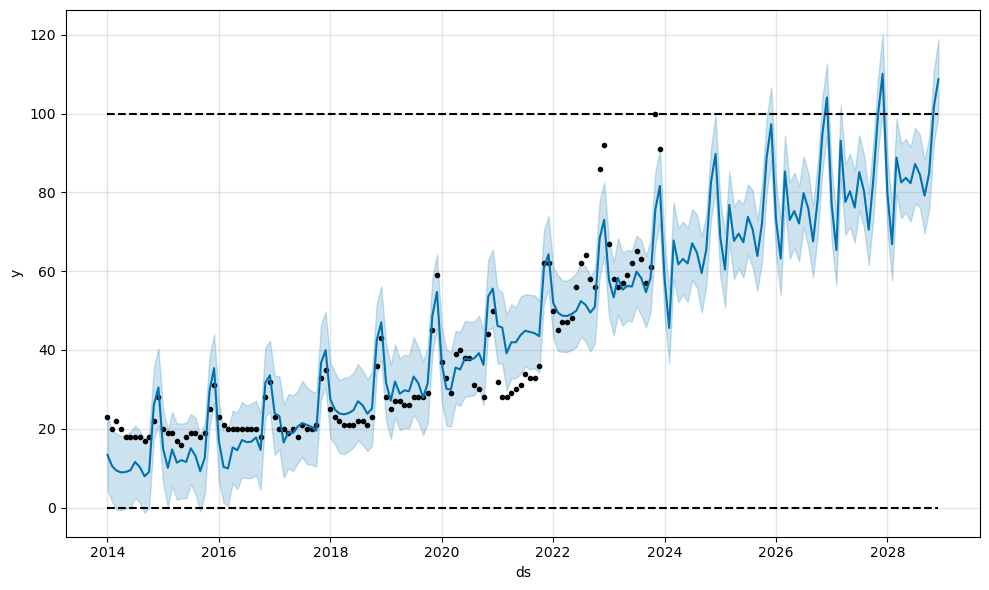

In [15]:
from IPython.display import display

for key, result in all_results.items():
    print(key) 
    # Display the forecast DataFrame
    display(result['dataframe'])
    # Display the plot
    fig = result['plot']
    display(fig)
